In [38]:
## import the basic modules in python
import numpy as numpy
import pandas as pd
import random as rd

In [39]:
## data downloaded from https://github.com/sib-swiss/intro-machine-learning-training/blob/main/extra_practice/breastfeeding_data.csv
bf_df=pd.read_csv('/Users/subasrees/Desktop/Machine_learning_practice/breastfeeding_data.csv')
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8667 non-null   float64
 1   consult     8667 non-null   object 
 2   breastfeed  8667 non-null   object 
 3   location    8667 non-null   object 
 4   age         8667 non-null   int64  
 5   educ        8667 non-null   object 
 6   smoke       8667 non-null   object 
 7   cesarean    8667 non-null   object 
 8   sex         8667 non-null   object 
 9   allergy     8667 non-null   object 
 10  wgt_gain_3  8667 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 744.9+ KB


In [40]:
print(bf_df.columns)

Index(['id', 'consult', 'breastfeed', 'location', 'age', 'educ', 'smoke',
       'cesarean', 'sex', 'allergy', 'wgt_gain_3'],
      dtype='object')


In [41]:
## missing values  - nil
bf_df.isna().sum().sort_values(ascending=False)

id            0
consult       0
breastfeed    0
location      0
age           0
educ          0
smoke         0
cesarean      0
sex           0
allergy       0
wgt_gain_3    0
dtype: int64

The data looks clean, does not require any imputation

In [42]:
## data types of features for data imputation
for i in bf_df.columns:
    print(f"{i}:{bf_df[i].dtype}")

id:float64
consult:object
breastfeed:object
location:object
age:int64
educ:object
smoke:object
cesarean:object
sex:object
allergy:object
wgt_gain_3:int64


<Axes: ylabel='age'>

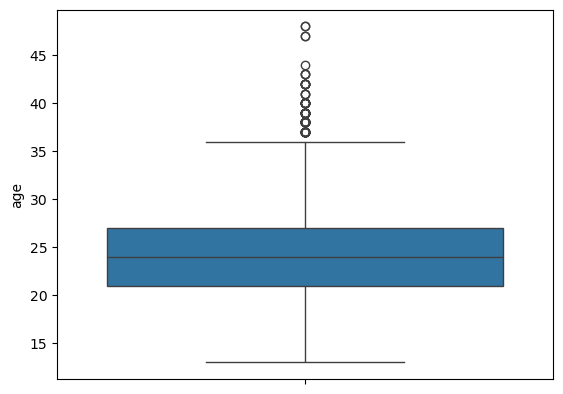

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(bf_df['age'])

The outliers can be removed from the dataframe

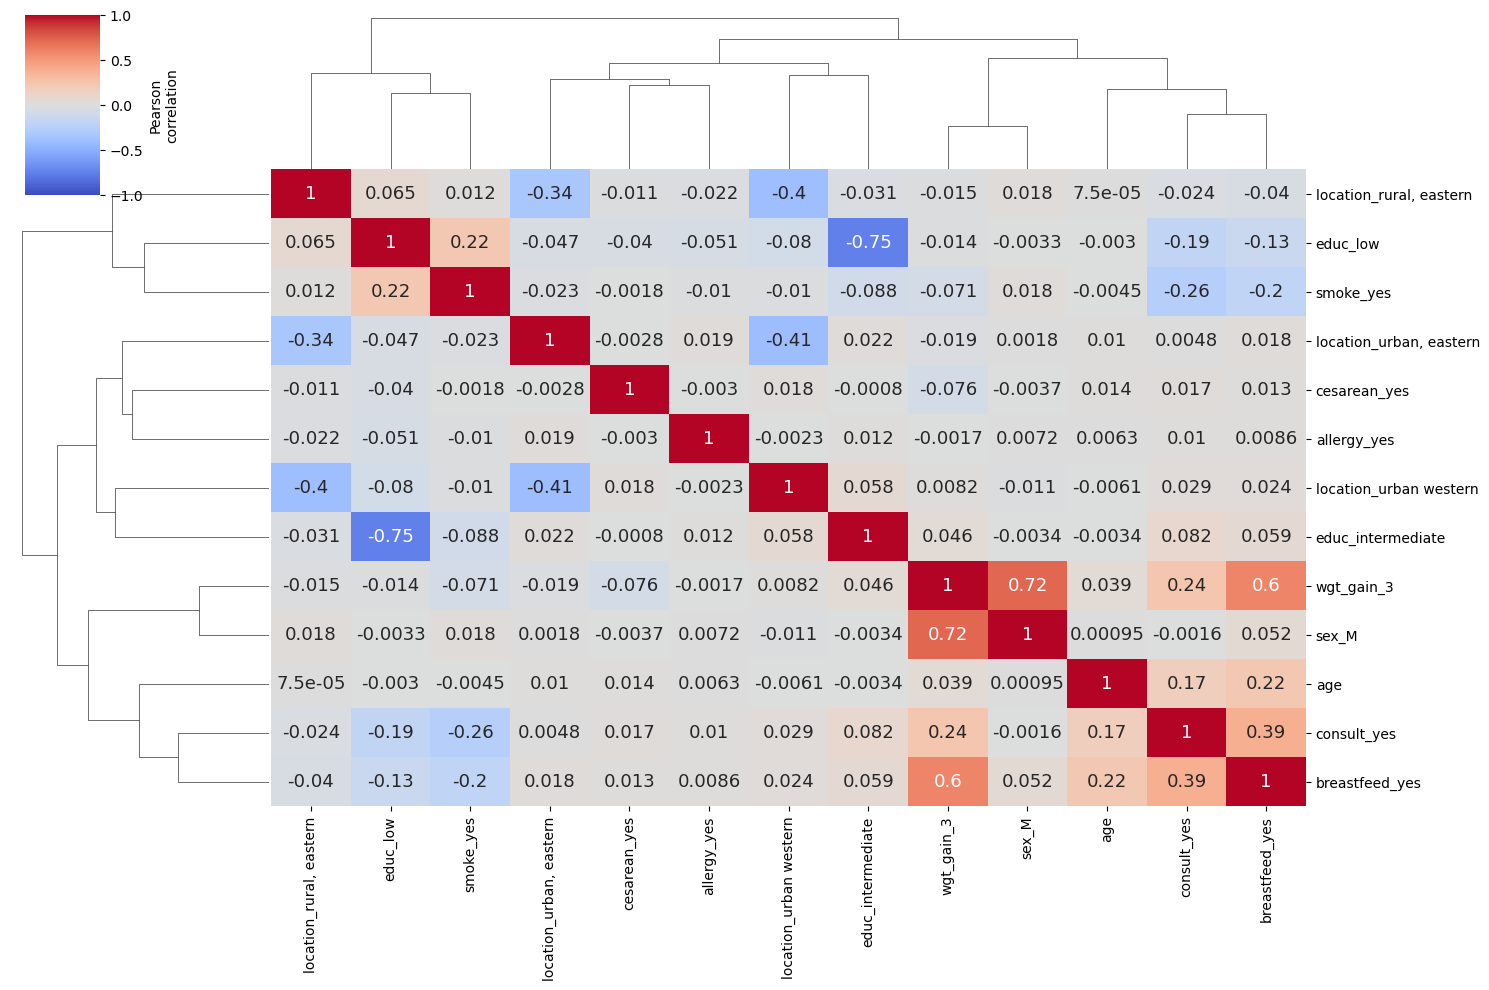

In [62]:
bf_corr=pd.get_dummies( bf_df.iloc[:,1:len(bf_df.columns)] , drop_first=True )
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = bf_corr.corr()

sns.clustermap(df_corr,
               figsize=(15,10),
               z_score=None,
               row_cluster=True,
               col_cluster=True,
               method='ward',
               cmap='coolwarm',vmax=1,vmin=-1, 
               annot=True, annot_kws={"size": 13},cbar_kws={"label": 'Pearson\ncorrelation'})
## sns allows you to do a hierarchical clustering that simply
plt.show()

Weight gain is found to be correlated with sex of the child and breast feeding. There are no other coorelations between the features.

In [44]:
bf_df=bf_df[bf_df['age']<35]

In [45]:
bf_df.columns

Index(['id', 'consult', 'breastfeed', 'location', 'age', 'educ', 'smoke',
       'cesarean', 'sex', 'allergy', 'wgt_gain_3'],
      dtype='object')

In [46]:
## create a feature and target dataframe
bf_features=bf_df.iloc[:,1:len(bf_df.columns)-1]
bf_target=bf_df['wgt_gain_3']

In [47]:
# get dummies will transform these categorical columns to sets of 0/1 columns
df = pd.get_dummies( bf_features , drop_first=True )
df.head()

,age,consult_yes,breastfeed_yes,"location_rural, eastern",location_urban western,"location_urban, eastern",educ_intermediate,educ_low,smoke_yes,cesarean_yes,sex_M,allergy_yes
0,26,False,False,False,True,False,True,False,False,False,False,False
1,26,False,False,False,False,True,True,False,True,True,False,False
2,21,False,True,False,False,True,False,True,False,False,False,False
3,26,False,False,False,False,False,False,False,True,False,True,True
4,28,False,False,False,True,False,True,False,True,True,False,False


In [48]:
target=bf_target
target.head()

0    2528
1    2478
2    3098
3    3095
4    2406
Name: wgt_gain_3, dtype: int64

8442

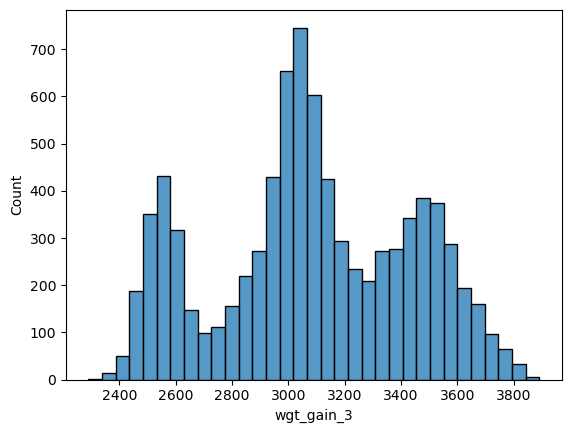

In [49]:
sns.histplot(target)
len(target)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


In [52]:
from sklearn.model_selection import train_test_split

SEED = 2023

#split your data

X_train, X_test, y_train, y_test = train_test_split( df , target,random_state= SEED)
# stratify is here to make sure that you split keeping the repartition of labels unaffected
# by default, the data is split such that 75% is in the train set and 25% in the test set 
print('train set size' , len(y_train))
print('test set size' , len(y_test))

train set size 6331
test set size 2111


In [75]:
models=[]
models.append(('KNN',KNeighborsRegressor()))
models.append(('Linear regression',LinearRegression()))
models.append(('Decision trees',DecisionTreeRegressor()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(('SVM',SVR()))
models.append(('Gradient Boost',GradientBoostingRegressor()))

In [54]:
## evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [76]:
for name, model in models:
    print(name,model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("MSE:",mean_squared_error(y_test,y_pred))
    print('R2:',r2_score(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print()

KNN KNeighborsRegressor()
MSE: 26211.986205589765
R2: 0.7755684505747145
MAE: 117.14258645191852

Linear regression LinearRegression()
MSE: 15775.194990351665
R2: 0.8649300580886305
MAE: 90.95003174368742

Decision trees DecisionTreeRegressor()
MSE: 22352.09283837279
R2: 0.8086175237058514
MAE: 97.59487551393097

Random Forest RandomForestRegressor()
MSE: 17962.527423073127
R2: 0.846201740320816
MAE: 89.77502731642882

SVM SVR()
MSE: 115294.86396513568
R2: 0.012825477721529865
MAE: 270.49215541803386

Gradient Boost GradientBoostingRegressor()
MSE: 14257.15932954383
R2: 0.8779277413914428
MAE: 82.37736958247926



Lets try to scale the features before deploying a model to see whether they are improving the performance of the model

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [78]:
for name, model in models:
    print(name,model)
    model.fit(X_train_scaled,y_train)
    y_pred_scaled=model.predict(X_test_scaled)
    print("MSE:",mean_squared_error(y_test,y_pred_scaled))
    print('R2:',r2_score(y_test,y_pred_scaled))
    print('MAE:',mean_absolute_error(y_test,y_pred_scaled))
    print()

KNN KNeighborsRegressor()
MSE: 18875.410630033162
R2: 0.8383854767620219
MAE: 93.00407389862623

Linear regression LinearRegression()
MSE: 16069.0758706767
R2: 0.8624137992748002
MAE: 92.89069805475529

Decision trees DecisionTreeRegressor()
MSE: 22472.31113867807
R2: 0.8075881938719667
MAE: 97.68515658135557

Random Forest RandomForestRegressor()
MSE: 18179.78481357243
R2: 0.8443415450501709
MAE: 90.03611450255995

SVM SVR()
MSE: 52159.49673124182
R2: 0.553401387562941
MAE: 177.3057519655077

Gradient Boost GradientBoostingRegressor()
MSE: 14257.15932954383
R2: 0.8779277413914428
MAE: 82.37736958247928



Scaling did not improve the performance of the three regressors namely Decison Tree, Random Forest and Linear Regression. It improved only KNN.
Let us now try hyperparameter tuning to improve the respective model performances.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from operator import itemgetter
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

## Linear regression
lr=LinearRegression()

pipeline_lr=Pipeline([('scalar',StandardScaler()),
                      ('poly',PolynomialFeatures(include_bias=False)),
                      ('model',lr)])


# define the hyperparameters you want to test with their range to be tested
grid_values = {'poly__degree': np.arange(1,4,1),
               'poly__interaction_only':[False,True]}

# Feed them to GridSearchCV with the right score (R squared)
grid_lr_acc = GridSearchCV(pipeline_lr, param_grid = grid_values, scoring='r2')

grid_lr_acc.fit(X_train_scaled, y_train)

y_decision_fn_scores_acc=grid_lr_acc.score(X_test_scaled,y_test)



print(f'Grid best score (r2): {grid_lr_acc.best_score_:.3f}' )
print( 'Grid best parameter (max. r2): ')
for k,v in grid_lr_acc.best_params_.items():
    print( f'\t{k} -> {v}' )

Grid best score (r2): 0.881
Grid best parameter (max. r2): 
	poly__degree -> 2
	poly__interaction_only -> True


In [68]:
lrm = grid_lr_acc.best_estimator_
y_predict = lrm.predict(X_test_scaled)

R2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)

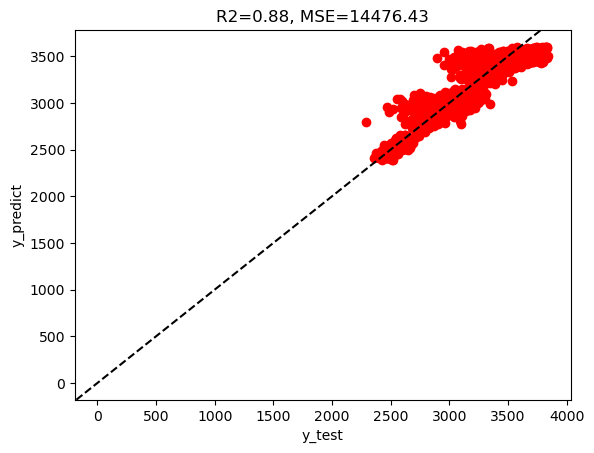

In [69]:
plt.plot(y_test,y_predict,'ro',label='Predicted', linewidth = 3)
plt.title('R2={0:.2f}, MSE={1:.2f}'.format(R2,MSE))
plt.axline((0, 0), slope=1, color="black", linestyle='dashed')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

R2 value for linear model after hyperparameter tuning on the scaled data increased only from 0.86 to 0.88

In [73]:
## SVM
from sklearn.svm import SVR

svr=SVR()

pipeline_svr=Pipeline([('scalar',StandardScaler()),('model',svr)])

from sklearn.model_selection import GridSearchCV

# define the hyperparameters you want to test with their range
# kernel: kernel type to be used in the algorithm (function that takes low dimensional input space 
# and transforms it to a higher dimensional space)
# degree: degree of the polynomial kernel function
# epsilon: parameters that controls which data points contribute to regularization
# C: inverse of regularization strength
grid_values = [{"model": [SVR(kernel='linear')],
                 "model__C":np.logspace(-2, 2, 10)},
                {"model": [SVR(kernel='rbf')],
                 "model__gamma": np.logspace(-2,1,10)},
                {"model": [SVR(kernel='poly')],
                 "model__C":np.logspace(-2, 2, 10),
                 "model__degree":np.arange(2,10,1)}]

# Feed them to GridSearchCV with the right score (R squared)
grid_svr_acc = GridSearchCV(pipeline_svr, param_grid = grid_values, scoring='r2')

grid_svr_acc.fit(X_train_scaled, y_train)

y_decision_fn_scores_acc=grid_svr_acc.score(X_test_scaled,y_test)


print('Grid best parameter (max. r2): ', grid_svr_acc.best_params_)
print('Grid best score (r2): ', grid_svr_acc.best_score_)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)


Grid best parameter (max. r2):  {'model': SVR(kernel='poly'), 'model__C': 100.0, 'model__degree': 3}
Grid best score (r2):  0.8667102784469527
Grid best parameter (max. r2) model on test:  0.8678456981982778


SVM regressor on the scaled data took over 8 minutes to be executed. The R2 value is ~0.87

In [74]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# define the hyperparameters you want to test with their range
grid_values = {'learning_rate':np.logspace(-1,0,5),
               'n_estimators':np.arange(25,101,25), 
               'max_depth':[2,3,4],
               'min_samples_split':[10,20],
               'min_samples_leaf':[2,5]}

# Feed them to GridSearchCV with the right score (R squared)
grid_tree = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_values, scoring='r2')

grid_tree.fit(X_train_scaled, y_train)

y_decision_fn_scores=grid_tree.score(X_test_scaled,y_test)


print('Grid best parameter (max. r2): ', grid_tree.best_params_)
print('Grid best score (r2): ', grid_tree.best_score_)
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores)

Grid best parameter (max. r2):  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 75}
Grid best score (r2):  0.881833304216465
Grid best parameter (max. r2) model on test:  0.8777690270674277
CPU times: user 2min 22s, sys: 642 ms, total: 2min 22s
Wall time: 2min 22s


GradientBoostingRegressor took about 2 minutes to be executed. The R2 value has improved from 0.82 to 0.88

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

## when it comes to criterion, we can now choose:
# * “squared_error” (default) for the mean squared error, minimizes the L2 loss
#                                           using the mean of each terminal node,
# * “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits
# * “absolute_error” for the mean absolute error, which minimizes the L1 loss
#                                           using the median of each terminal node,
# * “poisson” which uses reduction in Poisson deviance to find splits.
#
# let's try squared error and absolute error

grid_values = {'criterion': ['squared_error' , 'absolute_error'],
               'n_estimators':[500], 
               'max_depth':[2,4,8],
               'min_samples_split':np.arange(2,len(X_train)//5,20),
              'min_samples_leaf':np.arange(2,len(X_train)//5,20)}

grid_RF_bf = GridSearchCV(RandomForestRegressor(),
                                param_grid = grid_values, 
                                scoring='r2',n_jobs=-1,cv=5)

grid_RF_bf.fit(X_train, y_train)


print('Grid best score (r2): ', grid_RF_bf.best_score_)
print('Grid best parameter (max. r2): ', grid_RF_bf.best_params_)

RandomForestRegressor took more than 45 minutes to be executed